In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import cv2
from matplotlib import image

w:628  h:416


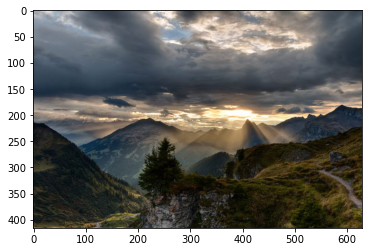

In [2]:
N=49
img=plt.imread("/home/starfish/桌面/DIP/pic/montain.jpg")
plt.imshow(img)
h,w,_=img.shape
print(f"w:{w}  h:{h}")

In [3]:
x=np.linspace(0,w,8)+w/7/2
x=x[:-1]
x=x.astype(np.int16)
y=np.linspace(0,h,8)+h/7/2
y=y[:-1]
y=y.astype(np.int16)
print(x,y)

[ 44 134 224 313 403 493 583] [ 29  89 148 208 267 326 386]


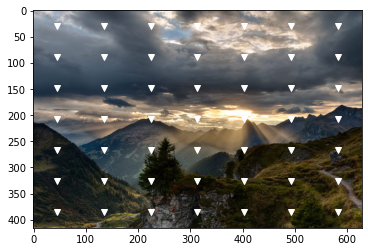

In [4]:
k_center_cord=[]
data=image.imread("/home/starfish/桌面/DIP/pic/montain.jpg")
for i in range(len(x)):
    for j in range(len(y)):
        k_center_cord.append([y[j],x[i]])
        plt.plot(x[i],y[j],marker='v', color="white")
plt.imshow(data)
plt.show()

In [5]:
k_center_cord

[[29, 44],
 [89, 44],
 [148, 44],
 [208, 44],
 [267, 44],
 [326, 44],
 [386, 44],
 [29, 134],
 [89, 134],
 [148, 134],
 [208, 134],
 [267, 134],
 [326, 134],
 [386, 134],
 [29, 224],
 [89, 224],
 [148, 224],
 [208, 224],
 [267, 224],
 [326, 224],
 [386, 224],
 [29, 313],
 [89, 313],
 [148, 313],
 [208, 313],
 [267, 313],
 [326, 313],
 [386, 313],
 [29, 403],
 [89, 403],
 [148, 403],
 [208, 403],
 [267, 403],
 [326, 403],
 [386, 403],
 [29, 493],
 [89, 493],
 [148, 493],
 [208, 493],
 [267, 493],
 [326, 493],
 [386, 493],
 [29, 583],
 [89, 583],
 [148, 583],
 [208, 583],
 [267, 583],
 [326, 583],
 [386, 583]]

In [6]:
s=int(np.sqrt(h*w/N))
img_lab=cv2.cvtColor(img,cv2.COLOR_BGR2LAB)  

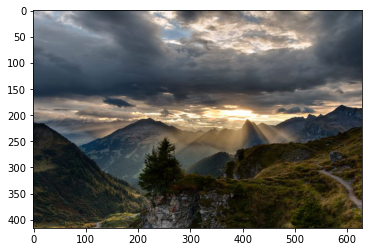

In [7]:
img_lab_=cv2.cvtColor(img_lab,cv2.COLOR_Lab2BGR)  
plt.imshow(img_lab_)

In [8]:
W=np.zeros((h,w))-1
L=np.zeros((h,w),dtype=np.int16)-1

In [9]:
W,L

(array([[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]]),
 array([[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]], dtype=int16))

In [10]:
center_vector=np.zeros((N,5))

In [11]:
XY_vector=np.zeros((N,2))
XY_vector=np.array(k_center_cord)
XY_vector.shape


(49, 2)

In [12]:
color_vector=img_lab[XY_vector.T[0],XY_vector.T[1]]
color_vector.shape

(49, 3)

In [13]:
# 初始化center_vector即为初始center的LABXY
XY_vector.shape,color_vector.shape
center_vector=np.hstack((color_vector,XY_vector))
center_vector.shape

(49, 5)

In [14]:
m = 2
num_iter = 8

for iter in range(num_iter):
    for k in range(0, N):
        for i in range(-s, s):
            for j in range(-s, s):
                # 求出绝对坐标
                i_ = i + center_vector[k][3]
                j_ = j + center_vector[k][4]

                if 0 <= j_ < w and 0 <= i_ < h:
                    D_s = np.sqrt(i ** 2 + j ** 2)
                    # print(img_lab[i_, j_,:] ,center_vector[k][0:3],( img_lab[i_, j_,:] - center_vector[k][0:3] )**2,np.sum( ( img_lab[i_, j_,:] - center_vector[k][0:3] )**2 ))
                    D_c = np.sqrt(np.abs(np.sum((img_lab[i_, j_, :] - center_vector[k][0:3])**2)))
                    D = np.sqrt((D_s / s * m) ** 2 + D_c ** 2)
                    if (D < W[i_, j_]) or (L[i_, j_] == -1):
                        W[i_, j_] = D
                        L[i_, j_] = k

                # 一次结束 更新center_vector
    for center_i in range(N):
        points_cord = np.argwhere(L == center_i)
        new_vector_XY = points_cord.mean(axis=0)
        new_vector_color = img_lab[points_cord.T[0], points_cord.T[1]].mean(axis=0)
        center_vector[center_i] = np.concatenate((new_vector_color, new_vector_XY))


In [15]:
L

array([[ 0,  0,  0, ..., 42, 42, 42],
       [ 0,  0,  0, ..., 42, 42, 42],
       [ 0,  0,  0, ..., 42, 42, 42],
       ...,
       [ 6,  6,  6, ..., 48, 48, 48],
       [ 6,  6,  6, ..., 48, 48, 48],
       [ 6,  6,  6, ..., 48, 47, 47]], dtype=int16)

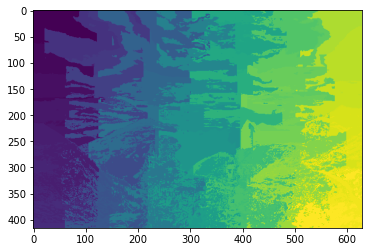

In [16]:
plt.imshow(L)

In [17]:
lab_res=np.zeros_like(img_lab)
for i in range(N):
    filt=L==i
    color=img_lab[filt].mean(axis=0)
    lab_res[filt]=color

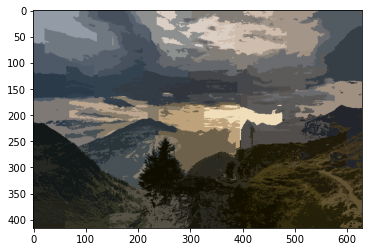

In [18]:
lab_res_=cv2.cvtColor(lab_res,cv2.COLOR_Lab2BGR)  
plt.imshow(lab_res_)

In [19]:
filt=L==1
color=img_lab[filt].mean(axis=0)

In [20]:
color

array([ 99.18656527, 131.78656527, 137.68136882])

In [21]:
filt.shape

(416, 628)

In [22]:
points_cord=np.argwhere(L==1)
new_vector_XY=points_cord.mean(axis=0)
new_vector_color=img_lab[points_cord.T[0],points_cord.T[1]].mean(axis=0)
newcenter=np.concatenate((new_vector_color,new_vector_XY))

In [23]:
newcenter

array([ 99.18656527, 131.78656527, 137.68136882, 108.50494297,
        42.12294043])